In [ ]:
# Download the data

In [ ]:
import pandas as pd
import pandas_datareader.data as data

start_date = '2001-01-01'
end_date = '2019-12-31'

predictors = {
    'sp500': {
      'ticker': '^GSPC',
    },
    'gdax': {
      'ticker': '^GDAXI',
    },
    'nikkei': {
      'ticker': '^N225',
    },
    'gold': {
      'ticker': 'GLD',
    },
    '10y_treasury': {
      'ticker': '^TNX',
    },
}

for predictor in predictors:
    predictors[predictor]['data'] = data.DataReader(predictors[predictor]['ticker'], 'yahoo', start_date, end_date)
    

In [ ]:
df = None
drop_cols = ['High','Low','Open','Adj Close','Volume']

for predictor in predictors:
    predictors[predictor]['data_mod'] = predictors[predictor]['data'].rename(columns={"Close": predictor}, errors="raise")
    predictors[predictor]['data_mod'] = predictors[predictor]['data_mod'].drop(drop_cols, axis=1)
    if df is None:
        df = predictors[predictor]['data_mod']
    else:     
        df = df.join(predictors[predictor]['data_mod'], how='outer')

df.tail(10)

In [1]:
df.to_csv('../data/stock.csv')

NameError: name 'df' is not defined

In [2]:
import pandas as pd
import numpy as np

col_dtypes = {
    'sp500': np.float32,
    'gdax': np.float32,
    'nikkei': np.float32,
    'gold': np.float32,
    '10y_treasury': np.float32,
}

dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')

df = pd.read_csv('../data/stock.csv', parse_dates=['Date'], date_parser=dateparse, dtype=col_dtypes)
df.tail(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  if sys.path[0] == '':


Date        sp500          gdax        nikkei        gold  \
4933 2019-12-18  3191.139893  13222.160156  23934.429688  139.020004   
4934 2019-12-19  3205.370117  13211.959961  23864.849609  139.380005   
4935 2019-12-20  3221.219971  13318.900391  23816.630859  139.520004   
4936 2019-12-23  3224.010010  13300.980469  23821.109375  139.949997   
4937 2019-12-24  3223.379883           NaN  23830.580078  141.270004   
4938 2019-12-25          NaN           NaN  23782.869141         NaN   
4939 2019-12-26  3239.909912           NaN  23924.919922  142.380005   
4940 2019-12-27  3240.020020  13337.110352  23837.720703  142.330002   
4941 2019-12-30  3221.290039  13249.009766  23656.619141  142.630005   
4942 2019-12-31  3230.780029           NaN           NaN  142.899994   

      10y_treasury  
4933         1.924  
4934         1.908  
4935         1.917  
4936         1.935  
4937           NaN  
4938           NaN  
4939         1.905  
4940         1.874  
4941         1.895  
4942         1.919

In [3]:
df.dropna(inplace=True)
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3503 entries, 1009 to 4941
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3503 non-null   datetime64[ns]
 1   sp500         3503 non-null   float32       
 2   gdax          3503 non-null   float32       
 3   nikkei        3503 non-null   float32       
 4   gold          3503 non-null   float32       
 5   10y_treasury  3503 non-null   float32       
dtypes: datetime64[ns](1), float32(5)
memory usage: 123.2 KB


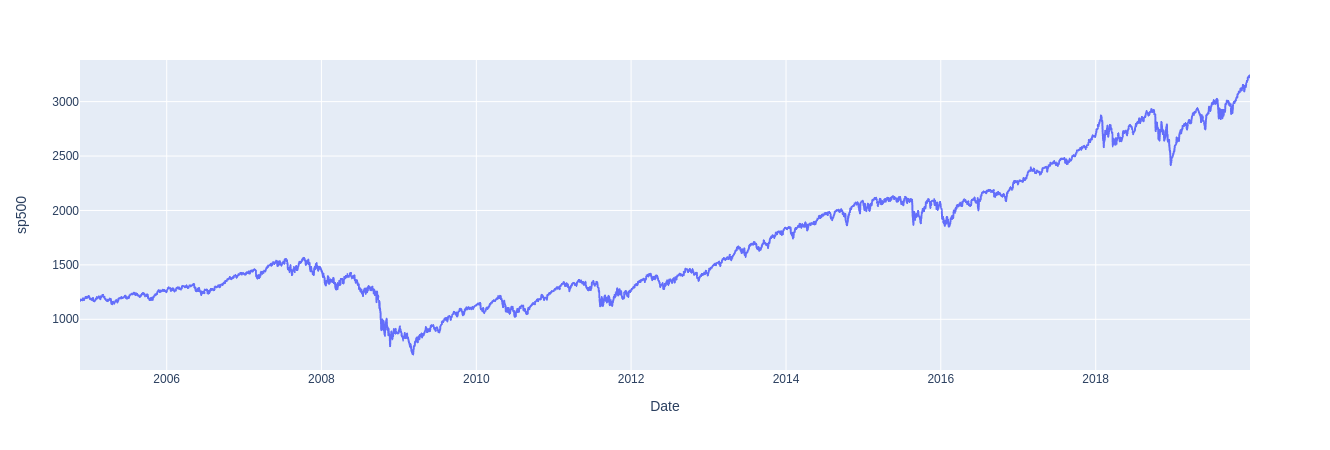

In [4]:
import plotly.express as px
fig = px.line(df, x='Date', y='sp500')
fig.show()

In [13]:
#from sklearn.preprocessing import StandardScaler
df_scaled = df.copy()
#df_scaled.iloc[:,1:] = StandardScaler().fit_transform(df_scaled.iloc[:,1:])
df_scaled.iloc[:,1:] = np.log(df_scaled.iloc[:,1:])
df_scaled
#df_scaled.head()

Date     sp500      gdax     nikkei      gold  10y_treasury
1009 2004-11-18  7.076274  8.337750   9.313115  3.792789      1.415125
1010 2004-11-19  7.065050  8.327216   9.313153  3.801762      1.434132
1011 2004-11-22  7.070928  8.324574   9.291864  3.805551      1.426716
1013 2004-11-24  7.074760  8.324894   9.293977  3.807773      1.433893
1016 2004-11-29  7.072057  8.330135   9.303638  3.815512      1.465567
...         ...       ...       ...        ...       ...           ...
4934 2019-12-19  8.072583  9.488877  10.080162  4.937204      0.646056
4935 2019-12-20  8.077516  9.496940  10.078139  4.938208      0.650761
4936 2019-12-23  8.078382  9.495593  10.078327  4.941285      0.660107
4940 2019-12-27  8.083335  9.498305  10.079024  4.958148      0.628075
4941 2019-12-30  8.077538  9.491678  10.071398  4.960254      0.639219

[3503 rows x 6 columns]

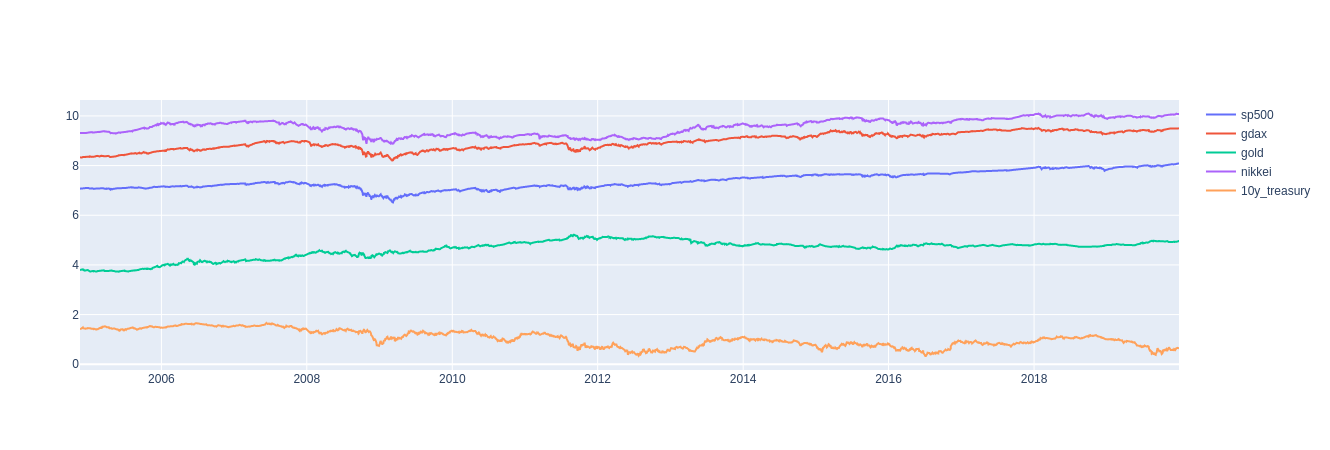

In [14]:
import plotly.graph_objects as go

mode = 'lines'
#mode = 'lines+markers'

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_scaled['Date'], y=df_scaled['sp500'],
                    mode=mode,
                    name='sp500'))
fig.add_trace(go.Scatter(x=df_scaled['Date'], y=df_scaled['gdax'],
                    mode=mode,
                    name='gdax'))
fig.add_trace(go.Scatter(x=df_scaled['Date'], y=df_scaled['gold'],
                    mode=mode,
                    name='gold'))
fig.add_trace(go.Scatter(x=df_scaled['Date'], y=df_scaled['nikkei'],
                    mode=mode,
                    name='nikkei'))
fig.add_trace(go.Scatter(x=df_scaled['Date'], y=df_scaled['10y_treasury'],
                    mode=mode,
                    name='10y_treasury'))
fig.show()

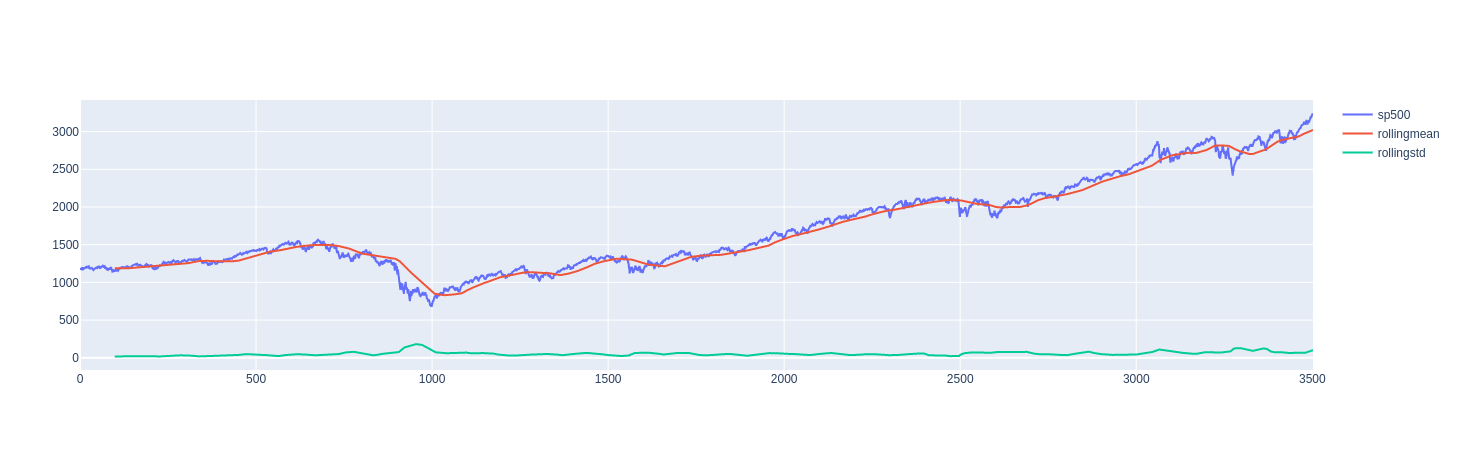

Results of dickey fuller test
Test Statistics                   1.197136
p-value                           0.995966
No. of lags used                 10.000000
Number of observations used    3492.000000
critical value (1%)              -3.432224
critical value (5%)              -2.862368
critical value (10%)             -2.567211
dtype: float64


In [79]:
#import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
#from pylab import rcParams
#rcParams['figure.figsize'] = 15, 10

from statsmodels.tsa.stattools import adfuller
def graph_stationarity(timeseries, column):
    #Determing rolling statistics
    rolmean = timeseries[column].rolling(100).mean()
    rolstd = timeseries[column].rolling(100).std()
    #Plot rolling statistics:
    #plt.plot(timeseries, color='blue',label='Original')
    #plt.plot(rolmean, color='red', label='Rolling Mean')
    #plt.plot(rolstd, color='black', label = 'Rolling Std')
    #plt.legend(loc='best')
    #plt.title('Rolling Mean and Standard Deviation')
    #plt.show(block=False)
    fig = go.Figure()
    fig.add_trace(go.Scatter(y=timeseries[column],
                        mode=mode,
                        name=column))
    fig.add_trace(go.Scatter(y=rolmean,
                        mode=mode,
                        name='rollingmean'))
    fig.add_trace(go.Scatter(y=rolstd,
                        mode=mode,
                        name='rollingstd'))
    fig.show()

def dickey_fuller(timeseries, column):
    #perform dickey fuller test  
    print("Results of Dickey Guller test")
    adft = adfuller(timeseries[column],autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
graph_stationarity(df, 'sp500')
dickey_fuller(df, 'sp500')

In [80]:
# make the data stationary
# first take the log 
# the calculate a rolling mean and stddev

moving_avg = df_scaled.rolling(100).mean()
std_dev = df_scaled.rolling(100).std()

moving_avg.tail(14)

sp500      gdax     nikkei      gold  10y_treasury
4925  8.004563  9.427501   9.993848  4.937063      0.568716
4926  8.005038  9.427919   9.994594  4.937466      0.567585
4927  8.005551  9.428331   9.995429  4.937963      0.566544
4928  8.006080  9.428886   9.996242  4.938493      0.565169
4929  8.006650  9.429549   9.997084  4.938831      0.564339
4930  8.007197  9.430292   9.998127  4.939298      0.562808
4931  8.007770  9.431135   9.999121  4.939702      0.561737
4932  8.008379  9.431802  10.000232  4.940189      0.560573
4933  8.009049  9.432491  10.001319  4.940514      0.559886
4934  8.009727  9.433265  10.002576  4.940724      0.559226
4935  8.010517  9.434094  10.003614  4.941093      0.558565
4936  8.011287  9.434885  10.004678  4.941494      0.558022
4940  8.012038  9.435540  10.005655  4.942120      0.557008
4941  8.012685  9.436104  10.006513  4.942717      0.556222

In [81]:
#take the difference of the series and the mean at every point in the series.

df_log_moving_avg_diff = df_scaled.drop(['Date'],axis=1) - moving_avg
df_log_moving_avg_diff.dropna(inplace=True)

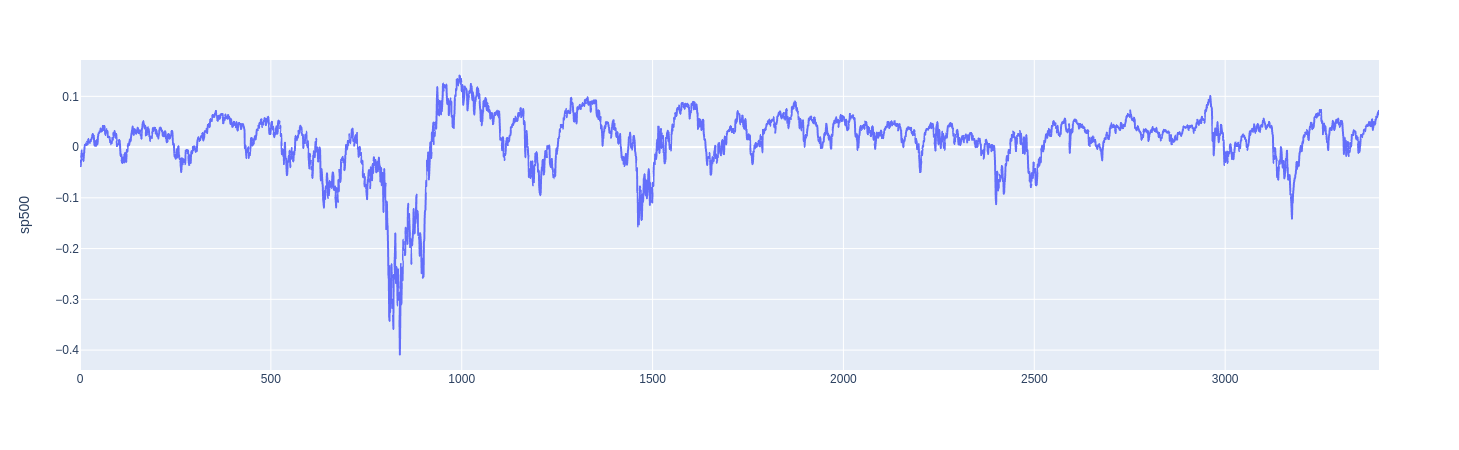

In [82]:
fig = px.line(df_log_moving_avg_diff, y='sp500')
fig.show()

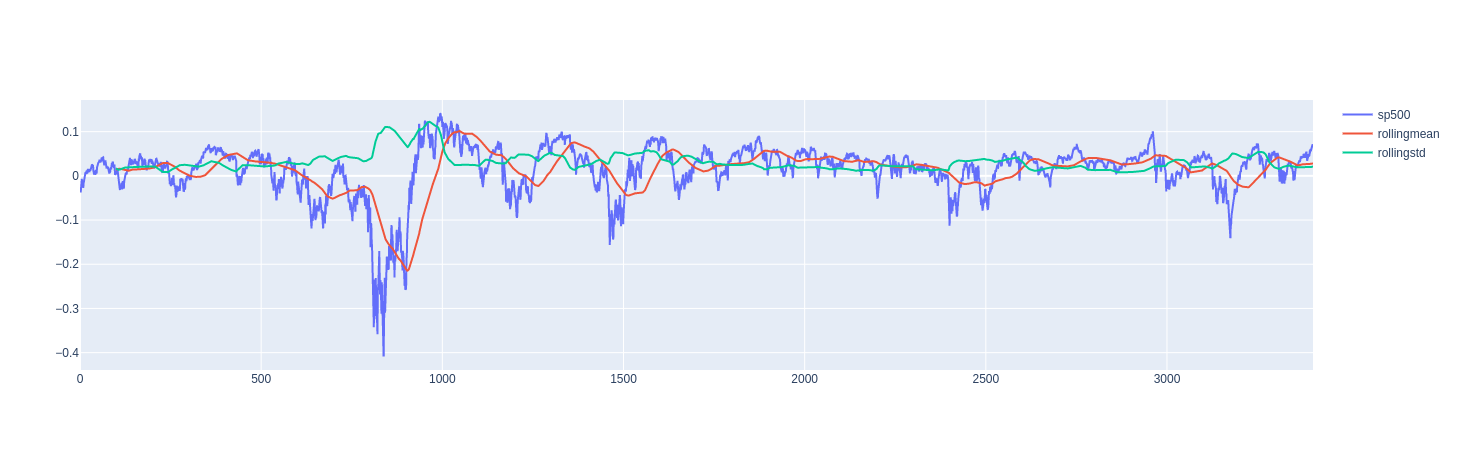

Results of dickey fuller test
Test Statistics                  -5.060890
p-value                           0.000017
No. of lags used                 11.000000
Number of observations used    3392.000000
critical value (1%)              -3.432279
critical value (5%)              -2.862392
critical value (10%)             -2.567224
dtype: float64


In [83]:
graph_stationarity(df_log_moving_avg_diff, 'sp500')
dickey_fuller(df_log_moving_avg_diff, 'sp500')

In [89]:
weighted_average = df_scaled.ewm(halflife=365, min_periods=0, adjust=True).mean()

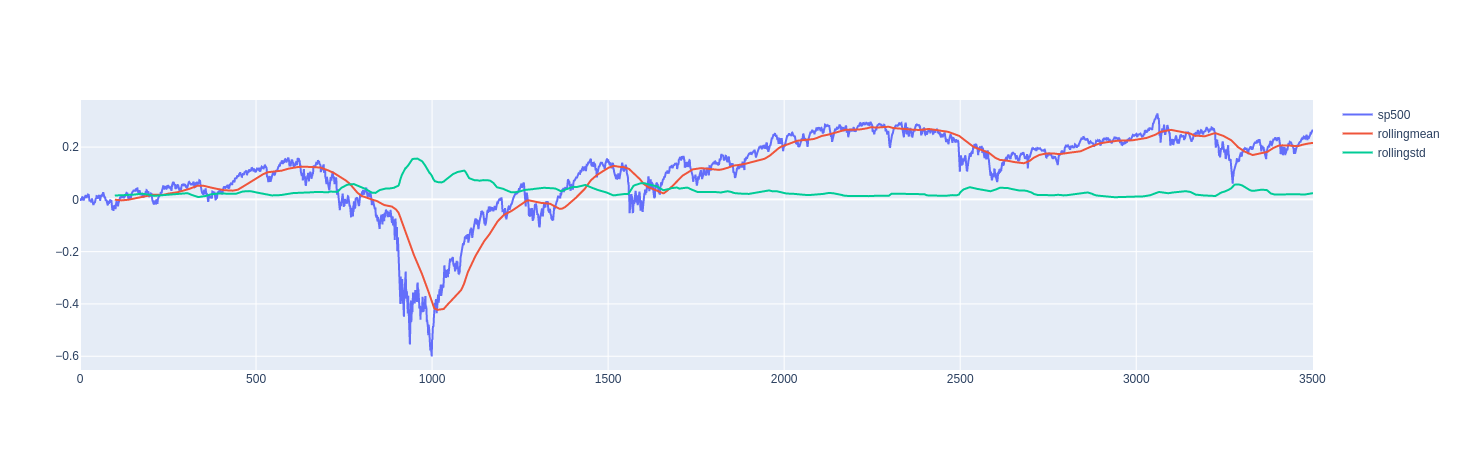

Results of dickey fuller test
Test Statistics                  -5.060890
p-value                           0.000017
No. of lags used                 11.000000
Number of observations used    3392.000000
critical value (1%)              -3.432279
critical value (5%)              -2.862392
critical value (10%)             -2.567224
dtype: float64


In [90]:
logScale_weightedMean = df_scaled.drop(['Date'], axis=1)-weighted_average
graph_stationarity(logScale_weightedMean, 'sp500')
dickey_fuller(df_log_moving_avg_diff, 'sp500')

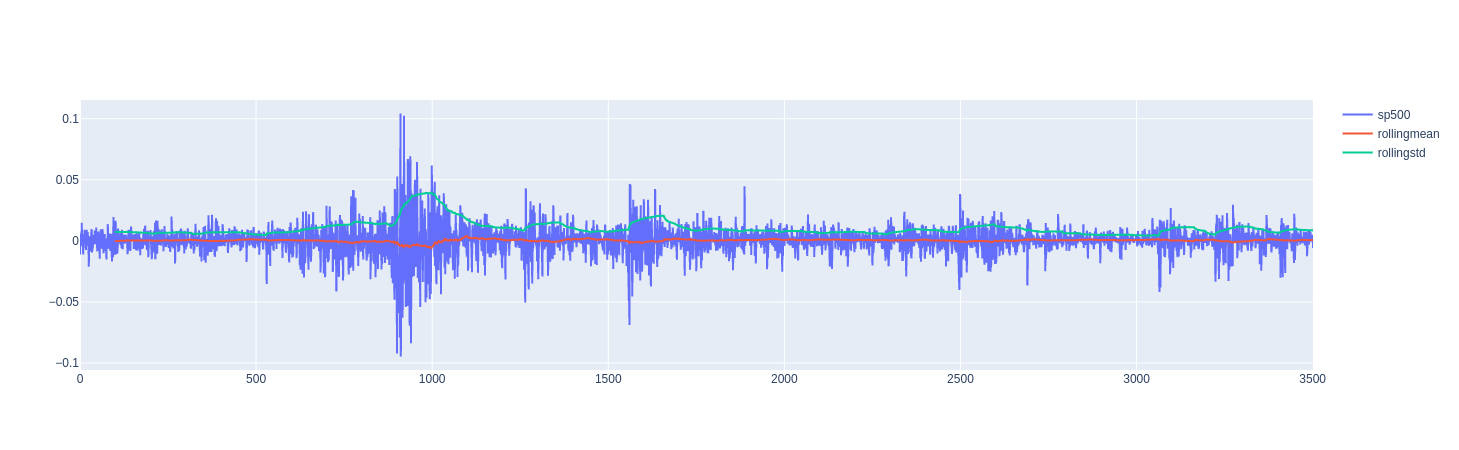

Results of dickey fuller test
Test Statistics               -1.758710e+01
p-value                        3.980825e-30
No. of lags used               1.000000e+01
Number of observations used    3.491000e+03
critical value (1%)           -3.432225e+00
critical value (5%)           -2.862368e+00
critical value (10%)          -2.567211e+00
dtype: float64


In [93]:
# use differencing instead
df_scaled_diff = df_scaled - df_scaled.shift()
df_scaled_diff.dropna(inplace=True)
graph_stationarity(df_scaled_diff,'sp500')
dickey_fuller(df_scaled_diff,'sp500')